In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
data = [] # a list to keep interesting dataframes in

## Blue

In [3]:
blue_file_path = r"O:\656-Earth-I\Build and Test results and photos\171117_CARB2 EM camera test with PDHU\Data\MTF Detector Testing\December 2017\12-12-17\Blue filter on-axis\MTF data output blue on-axis.csv"

Load the csv 

In [4]:
blue = pd.read_csv(blue_file_path)
blue = blue.set_index(['spatial frequency'])
blue.head()

,ACT MTF Deconvolved,ALT MTF Deconvolved,ACT MTF,ALT MTF
spatial frequency,,,,
0.0,1.000000,1.000000,1.000000,1.000000
6.0,0.994868,0.992128,0.993960,0.991223
12.0,0.991385,0.985892,0.987920,0.982446
18.0,0.989504,0.981229,0.981880,0.973669
24.0,0.982302,0.967539,0.969067,0.954504


Now create multi-index using MultiIndex.from_product

In [5]:
multi_index = pd.MultiIndex.from_product([['Blue on-axis'], list(blue.columns)], names=['File', 'Description'])

In [6]:
df_blue = pd.DataFrame(blue.as_matrix(), columns = multi_index, index = blue.index)
df_blue.head()

File                     Blue on-axis                                        
Description       ACT MTF Deconvolved ALT MTF Deconvolved   ACT MTF   ALT MTF
spatial frequency                                                            
0.0                          1.000000            1.000000  1.000000  1.000000
6.0                          0.994868            0.992128  0.993960  0.991223
12.0                         0.991385            0.985892  0.987920  0.982446
18.0                         0.989504            0.981229  0.981880  0.973669
24.0                         0.982302            0.967539  0.969067  0.954504

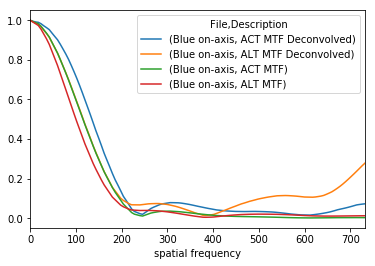

In [7]:
df_blue.plot();

Lets create a convenience function

In [8]:
def load_mtf_csv(csv_path):
    """
    Take a MFT scan csv file path and return the loaded dataframe
    
    Parameters
    ----------
    csv_path : str
            The path to the MTF .csv file to load
            
    Returns
    ----------
    df : pandas dataframe
            The csv data loaded into a multiindex dataframe
    """
    try:
        df = pd.read_csv(csv_path)
        csv_filename = csv_path.split('\\')[-1]
        print("Loading {}".format(csv_filename))
        df.set_index(['spatial frequency'], inplace=True)
        multi_index = pd.MultiIndex.from_product([[csv_filename.split('.')[0]], list(df.columns)], names=['File', 'Description'])
        df = pd.DataFrame(df.as_matrix(), columns = multi_index, index = df.index)
        return df
    except:
        print("Exception! Check your csv_path")

In [9]:
blue_on_df = load_mtf_csv(blue_file_path) # 

Loading MTF data output blue on-axis.csv


In [10]:
blue_on_df.head()

File              MTF data output blue on-axis                                \
Description                ACT MTF Deconvolved ALT MTF Deconvolved   ACT MTF   
spatial frequency                                                              
0.0                                   1.000000            1.000000  1.000000   
6.0                                   0.994868            0.992128  0.993960   
12.0                                  0.991385            0.985892  0.987920   
18.0                                  0.989504            0.981229  0.981880   
24.0                                  0.982302            0.967539  0.969067   

File                         
Description         ALT MTF  
spatial frequency            
0.0                1.000000  
6.0                0.991223  
12.0               0.982446  
18.0               0.973669  
24.0               0.954504

In [11]:
data.append(blue_on_df)

## Green off-axis

In [12]:
green_off_file_path = r"O:\656-Earth-I\Build and Test results and photos\171117_CARB2 EM camera test with PDHU\Data\MTF Detector Testing\December 2017\12-12-17\Green filter off-axis\MTF data output green off-axis.csv"

In [13]:
green_off_df = load_mtf_csv(green_off_file_path)

Loading MTF data output green off-axis.csv


In [14]:
data.append(green_off_df)

## Green on-axis

In [15]:
green_on_file_path = r"O:\656-Earth-I\Build and Test results and photos\171117_CARB2 EM camera test with PDHU\Data\MTF Detector Testing\December 2017\12-12-17\Green filter on-axis\MTF data output green on-axis.csv"

In [16]:
green_on_df = load_mtf_csv(green_on_file_path)

Loading MTF data output green on-axis.csv


In [17]:
data.append(green_on_df)

In [18]:
green_on_df.head()

File              MTF data output green on-axis                                \
Description                 ACT MTF Deconvolved ALT MTF Deconvolved   ACT MTF   
spatial frequency                                                               
0.0                                    1.000000            1.000000  1.000000   
6.0                                    0.993708            0.991050  0.992801   
12.0                                   0.989060            0.983729  0.985603   
18.0                                   0.986001            0.977970  0.978404   
24.0                                   0.972178            0.962780  0.959080   

File                         
Description         ALT MTF  
spatial frequency            
0.0                1.000000  
6.0                0.990145  
12.0               0.980290  
18.0               0.970435  
24.0               0.949808

## Red

In [19]:
red_file_path = r"O:\656-Earth-I\Build and Test results and photos\171117_CARB2 EM camera test with PDHU\Data\MTF Detector Testing\December 2017\12-12-17\Red filter on-axis\MTF data output red.csv"

In [20]:
red_on_df = load_mtf_csv(red_file_path)

Loading MTF data output red.csv


In [21]:
data.append(red_on_df)

## All results

In [22]:
#result = pd.merge(df_red, df_green_on, on=['spatial frequency'])
#result

In [23]:
result = pd.concat(data, axis=1)
result.head()

File              MTF data output blue on-axis                                \
Description                ACT MTF Deconvolved ALT MTF Deconvolved   ACT MTF   
spatial frequency                                                              
0.0                                   1.000000            1.000000  1.000000   
6.0                                   0.994868            0.992128  0.993960   
12.0                                  0.991385            0.985892  0.987920   
18.0                                  0.989504            0.981229  0.981880   
24.0                                  0.982302            0.967539  0.969067   

File                        MTF data output green off-axis  \
Description         ALT MTF            ACT MTF Deconvolved   
spatial frequency                                            
0.0                1.000000                       1.000000   
6.0                0.991223                       0.994412   
12.0               0.982446                       0.990472   
18.0               0.973669                       0.988128   
24.0               0.954504                       0.981779   

File                                                       \
Description       ALT MTF Deconvolved   ACT MTF   ALT MTF   
spatial frequency                                           
0.0                          1.000000  1.000000  1.000000   
6.0                          0.989837  0.993505  0.988934   
12.0                         0.981297  0.987010  0.977867   
18.0                         0.974307  0.980515  0.966801   
24.0                         0.958297  0.968551  0.945385   

File              MTF data output green on-axis                                \
Description                 ACT MTF Deconvolved ALT MTF Deconvolved   ACT MTF   
spatial frequency                                                               
0.0                                    1.000000            1.000000  1.000000   
6.0                                    0.993708            0.991050  0.992801   
12.0                                   0.989060            0.983729  0.985603   
18.0                                   0.986001            0.977970  0.978404   
24.0                                   0.972178            0.962780  0.959080   

File                        MTF data output red                                \
Description         ALT MTF ACT MTF Deconvolved ALT MTF Deconvolved   ACT MTF   
spatial frequency                                                               
0.0                1.000000            1.000000            1.000000  1.000000   
6.0                0.990145            0.994958            0.994567  0.994050   
12.0               0.980290            0.991565            0.990782  0.988099   
18.0               0.970435            0.989775            0.988596  0.982149   
24.0               0.949808            0.982762            0.980994  0.969521   

File                         
Description         ALT MTF  
spatial frequency            
0.0                1.000000  
6.0                0.993660  
12.0               0.987319  
18.0               0.980979  
24.0               0.967777

In [24]:
blue_on_ACT_MTF = result['MTF data output blue on-axis']['ACT MTF']

To do: Get the spatial frequency at MTF = 0.5

In [25]:
root = r"O:\\656-Earth-I\\Build and Test results and photos\\171117_CARB2 EM camera test with PDHU\\Data\\MTF Detector Testing\\"

Save the table to csv

In [26]:
#result.to_csv(root + 'MTF_all_data.csv', sep=',')
result.to_csv('MTF_all_data.csv', sep=',')

## Plotting

In [27]:
result.columns.tolist()

[('MTF data output blue on-axis', 'ACT MTF Deconvolved'),
 ('MTF data output blue on-axis', 'ALT MTF Deconvolved'),
 ('MTF data output blue on-axis', 'ACT MTF'),
 ('MTF data output blue on-axis', 'ALT MTF'),
 ('MTF data output green off-axis', 'ACT MTF Deconvolved'),
 ('MTF data output green off-axis', 'ALT MTF Deconvolved'),
 ('MTF data output green off-axis', 'ACT MTF'),
 ('MTF data output green off-axis', 'ALT MTF'),
 ('MTF data output green on-axis', 'ACT MTF Deconvolved'),
 ('MTF data output green on-axis', 'ALT MTF Deconvolved'),
 ('MTF data output green on-axis', 'ACT MTF'),
 ('MTF data output green on-axis', 'ALT MTF'),
 ('MTF data output red', 'ACT MTF Deconvolved'),
 ('MTF data output red', 'ALT MTF Deconvolved'),
 ('MTF data output red', 'ACT MTF'),
 ('MTF data output red', 'ALT MTF')]

Lets get the unique descriptions

In [28]:
unique_descriptions = list(result.columns.get_level_values(1).unique())
unique_descriptions

['ACT MTF Deconvolved', 'ALT MTF Deconvolved', 'ACT MTF', 'ALT MTF']

### Lets plot a single colour

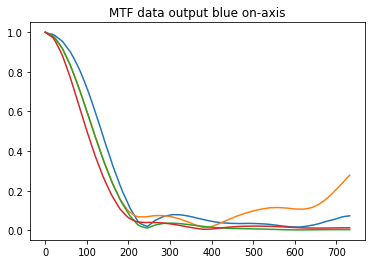

In [29]:
to_plot = 'MTF data output blue on-axis'
plt.plot(result[to_plot]);
plt.title(to_plot)

### Lets now plot all colours by scan description 

In [30]:
def plot_category(df, description):
    """
    Convenience to plot all colours for a single scan direction.
    
    Parameters
    ----------
    df : dataframe
            The dataframe containing the data to plot.
    
    description : string
            The column to plot.
            
    Returns
    ----------
    ax : AxesSubplot
            A subpot object
    """

    fig, ax = plt.subplots()
    df_ = df.xs(description, level='Description', axis=1)
    ax.plot(df_)
    
    ax.legend(df_.columns.tolist()) # , loc='center left', bbox_to_anchor=(1, 0.5)
    ax.set_title('The MTF for {}'.format(description))
    ax.set_xlabel('Spatial frequency')
    ax.set_ylabel('MFT')
    return ax

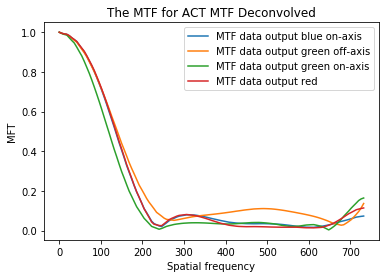

In [31]:
description = unique_descriptions[0]
myplot = plot_category(result, description);

(0.4, 0.6)

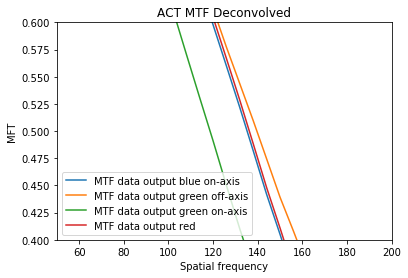

In [32]:
myplot = plot_category(result, description);
myplot.set_title(description);   # To overwrite the label
myplot.set_xlim([50,200])  # To overwrite 
myplot.set_ylim([0.4,0.6])  # To overwrite 

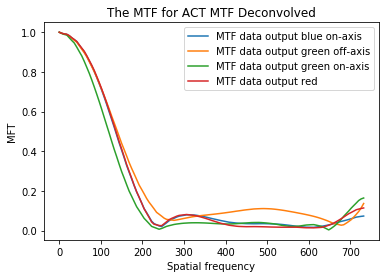

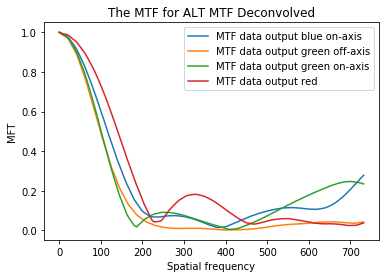

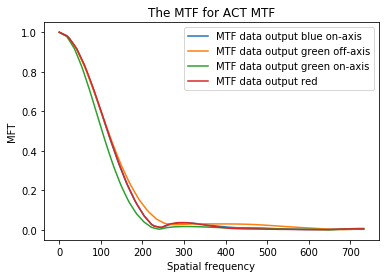

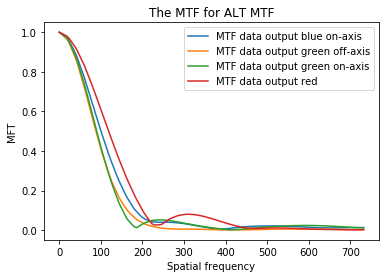

In [33]:
for d in unique_descriptions:
    plot_category(result, d)